In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import json

In [2]:
with open("C:\\Users\\simon\\Desktop\\pred_results.json","r") as f:
    res_dict = json.load(f)

In [3]:
res_dict

{'rbf-OFAMobileNetV3-integer-300': {'rmse': [0.6107079939559854,
   0.5279232698900829,
   0.468131552401006,
   0.5184216966317141,
   0.5632466672105643,
   0.4773900459700666,
   0.42770861369008534,
   0.5032346645031492,
   0.4441220668793387,
   0.4343927146345927],
  'r': [0.7106318861757791,
   0.7319737945624667,
   0.8805462906550297,
   0.7996793726066487,
   0.7919696026468321,
   0.7913478766400417,
   0.8781180030616277,
   0.8249708541825269,
   0.8228029764000115,
   0.8666159085254964],
  'rho': [0.6193885568765193,
   0.7076037926098503,
   0.8623154377644461,
   0.7477392048211642,
   0.7051580226508479,
   0.8359651322813237,
   0.8197038117699844,
   0.7959971565731186,
   0.7977680759620552,
   0.7902234828068726],
  'tau': [0.4569057743101286,
   0.5008580208623467,
   0.6801693799984885,
   0.5661713025960227,
   0.44967455699339626,
   0.662208255771022,
   0.666675084121944,
   0.6107520102447621,
   0.6398740757150316,
   0.5906173285883414],
  'time_mins': [

In [4]:
aggr_res_dict = {}
std_res_dict = {}
for key in res_dict.keys():
    aggr_res_dict[key] = {}
    std_res_dict[key] = {}
    for metric in res_dict[key].keys():
        aggr_res_dict[key][metric] = {}
        aggr_res_dict[key][metric]["mean"] = np.mean(res_dict[key][metric])
        aggr_res_dict[key][metric]["std"] = np.std(res_dict[key][metric])
        

In [5]:
aggr_res_dict

{'rbf-OFAMobileNetV3-integer-300': {'rmse': {'mean': 0.4975279285766586,
   'std': 0.05612872013634778},
  'r': {'mean': 0.809865656545646, 'std': 0.0547281352019012},
  'rho': {'mean': 0.7681862674116182, 'std': 0.06960182278237688},
  'tau': {'mean': 0.5823905789201483, 'std': 0.08214769473816962},
  'time_mins': {'mean': 0.00456232229868571, 'std': 0.003156013281174459}},
 'rbf-OFAMobileNetV3-integer-250': {'rmse': {'mean': 0.5224738993464598,
   'std': 0.06608572117694361},
  'r': {'mean': 0.7833083284061313, 'std': 0.061629475400553135},
  'rho': {'mean': 0.7389357783477397, 'std': 0.09973714832737131},
  'tau': {'mean': 0.5608882468508145, 'std': 0.09720077211935653},
  'time_mins': {'mean': 0.0028056331475575765, 'std': 7.40277822126478e-05}},
 'rbf-OFAMobileNetV3-integer-200': {'rmse': {'mean': 0.4776606916694227,
   'std': 0.06072722525991307},
  'r': {'mean': 0.8458895434832702, 'std': 0.03682835470617145},
  'rho': {'mean': 0.8119826318982328, 'std': 0.07949238714466653},
  

# BARPLOT

In [6]:
def get_barplot_metric_values(aggr_res_dict, feature_enc, train_size, metric):
    
    keys = aggr_res_dict.keys()

    avg_metric = []
    std_metric = []

    for key in keys:
        if f"{feature_enc}-{train_size}" in key:
            avg_metric.append(aggr_res_dict[key][metric]["mean"])
            std_metric.append(aggr_res_dict[key][metric]["std"])

    avg_metric = np.array(avg_metric)
    std_metric = np.array(std_metric)
    keys = [key for key in keys if f"{feature_enc}-{train_size}" in key]

    return keys, avg_metric, std_metric

In [7]:
feature_enc = "integer"     # ["one-hot", "integer"]
train_size = 300            # [300, 250, 200, 150, 100]
metric = "rho"              # ["rmse", "r", "rho", "tau", "time_mins"]

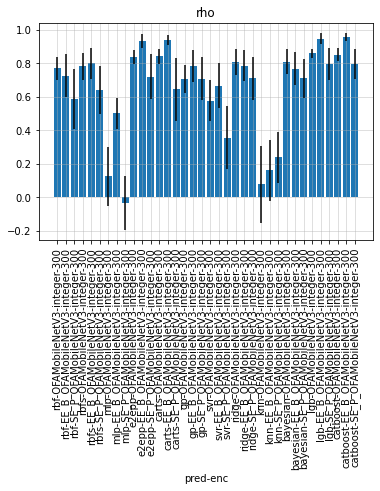

In [8]:
keys, values, errors = get_barplot_metric_values(aggr_res_dict, feature_enc, train_size, metric)
plt.bar(keys, values, yerr=errors)
plt.rcParams["figure.figsize"] = (10,8)
plt.title(metric)
plt.xlabel('pred-enc')
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.rcParams.update({'font.size': 9})
plt.show()

# LINEPLOT

In [9]:
def get_lineplot_metric_values(aggr_res_dict, predictors, train_size, network, feature_enc, metric):
    
    keys = aggr_res_dict.keys()
    
    enc_dict = {}
    for predictor in predictors:
        
        enc_mean_key = predictor+"_mean"
        enc_std_key = predictor+"_std"

        enc_dict[enc_mean_key] = []
        enc_dict[enc_std_key] = []

        for ts in train_size:

            for key in keys:
                if key == f"{predictor}-{network}-{feature_enc}-{ts}":
                    enc_dict[enc_mean_key].append(aggr_res_dict[key][metric]["mean"])
                    enc_dict[enc_std_key].append(aggr_res_dict[key][metric]["std"])

        enc_dict[enc_mean_key] = np.array(enc_dict[enc_mean_key])
        enc_dict[enc_std_key] = np.array(enc_dict[enc_std_key])
            
    return enc_dict

In [10]:
predictors = ["rbf", "rbfs","mlp","e2epp","carts","gp","svr","ridge","knn","bayesian","lgb","catboost"]
train_size = [100, 150, 200, 250, 300]

network = "OFAMobileNetV3"  #["OFAMobileNetV3","EE_B_OFAMobileNetV3", "SE_P_OFAMobileNetV3"]
feature_enc = "integer"     # ["one-hot", "integer"]
metric = "rho"              # ["rmse", "r", "rho", "tau", "time_mins"]

In [11]:
data=get_lineplot_metric_values(aggr_res_dict, predictors, train_size, network, feature_enc, metric)
    

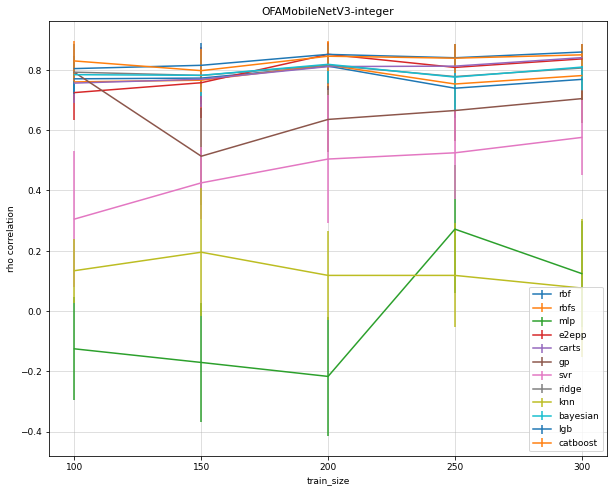

In [12]:
for predictor in predictors:
    plt.errorbar(train_size, data[predictor+"_mean"], yerr=data[predictor+"_std"], label=predictor)

plt.rcParams["figure.figsize"] = (20,20)
plt.title(f"{network}-{feature_enc}")
plt.xlabel('train_size')
plt.xticks(train_size)
plt.ylabel(metric+" correlation")
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()

In [13]:
data

{'rbf_mean': array([0.77008245, 0.77250554, 0.81198263, 0.73893578, 0.76818627]),
 'rbf_std': array([0.04861179, 0.07858704, 0.07949239, 0.09973715, 0.06960182]),
 'rbfs_mean': array([0.75979883, 0.76554429, 0.81568345, 0.7529096 , 0.78080604]),
 'rbfs_std': array([0.06067364, 0.08038939, 0.07554406, 0.10261401, 0.07938919]),
 'mlp_mean': array([-0.12530254, -0.17050246, -0.21679298,  0.27159961,  0.12420389]),
 'mlp_std': array([0.17065494, 0.19595576, 0.19768833, 0.21195723, 0.17562966]),
 'e2epp_mean': array([0.72439306, 0.75709621, 0.85135777, 0.80794916, 0.83611482]),
 'e2epp_std': array([0.09241093, 0.11828215, 0.03868736, 0.03924357, 0.04459628]),
 'carts_mean': array([0.75591426, 0.7686434 , 0.81064265, 0.81215555, 0.84023311]),
 'carts_std': array([0.06768134, 0.0933007 , 0.04324242, 0.06118046, 0.04619936]),
 'gp_mean': array([0.79160241, 0.51340135, 0.6354068 , 0.66493986, 0.70435758]),
 'gp_std': array([0.05534297, 0.1609188 , 0.1092261 , 0.10233122, 0.08170036]),
 'svr_mea

# ENCODING

In [14]:
def get_encoding_metric_values(aggr_res_dict, predictor, train_size, network, feature_encodings, metric):
    
    keys = aggr_res_dict.keys()
    
    enc_dict = {}
    for feat_enc in feature_encodings:
        
        enc_mean_key = f"{feat_enc}_mean"
        enc_std_key = f"{feat_enc}_std"

        enc_dict[enc_mean_key] = []
        enc_dict[enc_std_key] = []

        for ts in train_size:

            for key in keys:
                if key == f"{predictor}-{network}-{feat_enc}-{ts}":
                    enc_dict[enc_mean_key].append(aggr_res_dict[key][metric]["mean"])
                    enc_dict[enc_std_key].append(aggr_res_dict[key][metric]["std"])

        enc_dict[enc_mean_key] = np.array(enc_dict[enc_mean_key])
        enc_dict[enc_std_key] = np.array(enc_dict[enc_std_key])
            
    return enc_dict

In [15]:
train_size = [100, 150, 200, 250, 300]
feature_encs = ["one-hot", "integer"]

predictor = "lgb" #["rbf", "rbfs","mlp","e2epp","carts","gp","svr","ridge","knn","bayesian","lgb","catboost"]
network = "OFAMobileNetV3"  #["OFAMobileNetV3","EE_B_OFAMobileNetV3", "SE_P_OFAMobileNetV3"]
metric = "tau"              # ["rmse", "r", "rho", "tau", "time_mins]

In [16]:
data=get_encoding_metric_values(aggr_res_dict, predictor, train_size, network, feature_encs, metric)

In [17]:
data

{'one-hot_mean': array([0.66213731, 0.63129846, 0.65837582, 0.62600562, 0.68398185]),
 'one-hot_std': array([0.05486373, 0.10936156, 0.08514508, 0.05774578, 0.04872672]),
 'integer_mean': array([0.63730605, 0.64878159, 0.68187541, 0.67302075, 0.69269649]),
 'integer_std': array([0.08713539, 0.08878058, 0.04371048, 0.05167273, 0.03940591])}

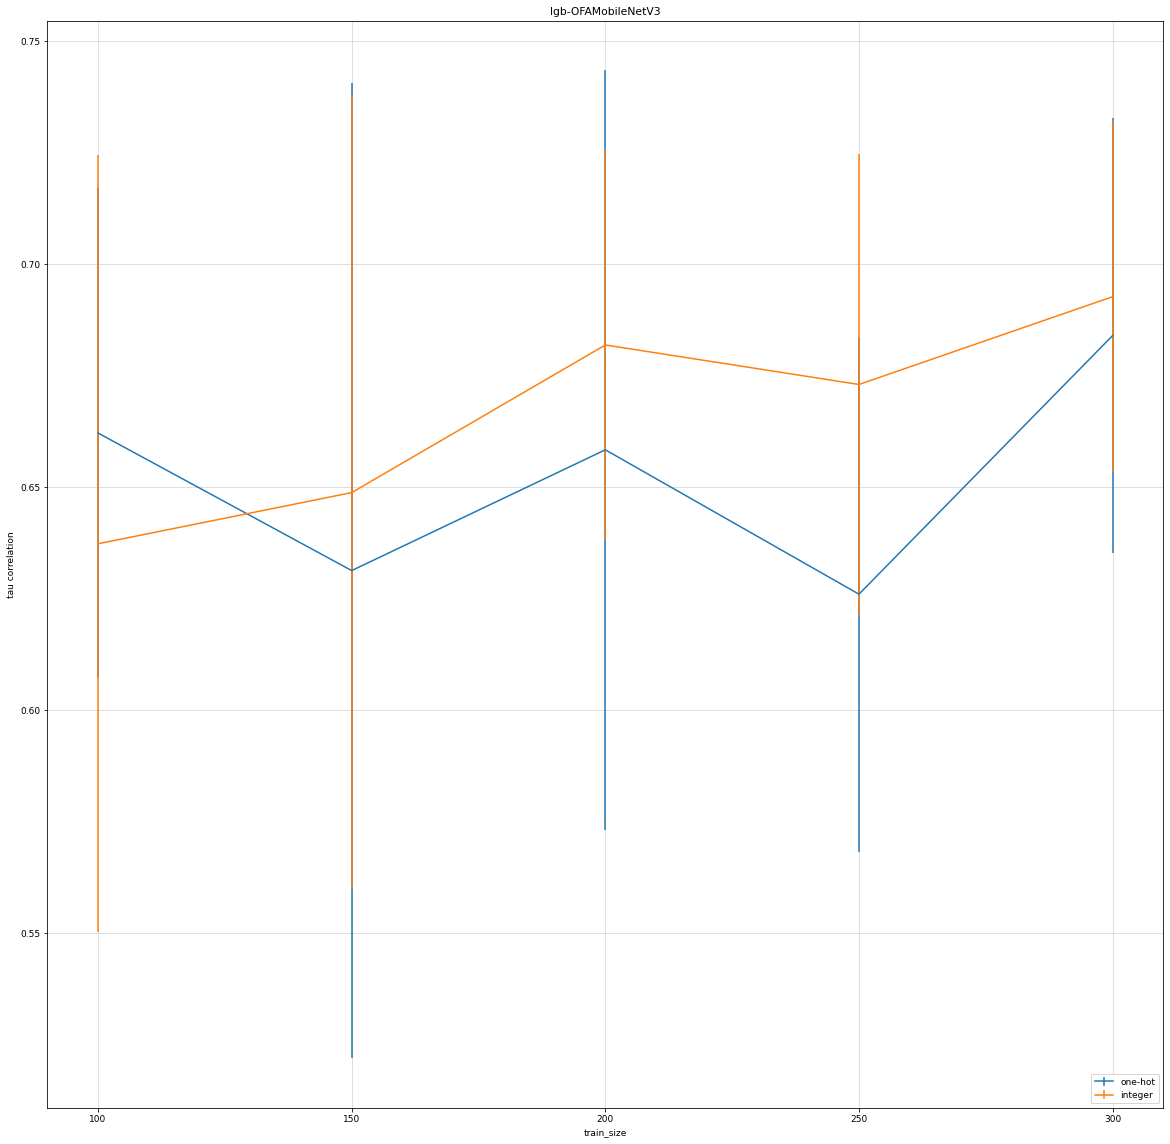

In [18]:
for feat_enc in feature_encs:
    plt.errorbar(train_size, data[feat_enc+"_mean"], yerr=data[feat_enc+"_std"], label=feat_enc)

plt.rcParams["figure.figsize"] = (10,10)
plt.title(f"{predictor}-{network}")
plt.xlabel('train_size')
plt.xticks(train_size)
plt.ylabel(metric+" correlation")
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()